In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio.Seq import Seq
import bioinfo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [49]:
df = bioinfo.gen_df("./data/TRIM5ALPHA_complete_PopSet")

In [50]:
df_total = pd.DataFrame()

for i in range(17):    
    b = bioinfo.gen_df2(df['Species'][i],df['Sequence'][i],3)
    y = np.empty(len(b.index))
    y[:] = i
    b['label'] = y
    b.reset_index(drop=True, inplace=True)
    df_total.reset_index(drop=True, inplace=True)
    df_total = pd.concat([df_total,b], axis=0)   


In [54]:
feat_cols = list(filter(lambda col: col != 'Fragment' and col != 'label',df_total.columns))


x = df_total.loc[:, feat_cols].values
y = df_total.loc[:, feat_cols].values

In [55]:
x = StandardScaler().fit_transform(x)

In [56]:
pca = PCA(n_components=2)
    
principalComponents = pca.fit_transform(x)
    
principalDf = pd.DataFrame(data = principalComponents, 
            columns = ['principal component 1', 'principal component 2'])

principalDf


,principal component 1,principal component 2
0,-1.295914,-2.917242
1,-2.213255,-0.075198
2,4.505776,1.058281
3,-2.054179,-2.006706
4,-0.502009,-3.510658
5,0.391895,-1.526332
6,-1.172654,-2.378367
7,-1.823028,-3.849718
8,-1.904538,-2.868369
9,-2.709550,-1.246708


In [57]:
principalDf.shape

(3004, 2)

In [58]:
df_total[['label']].shape

(3004, 1)

In [59]:
pd.concat([principalDf,df_total[['label']]],axis = 1)

ValueError: Shape of passed values is (3, 3191), indices imply (3, 3004)

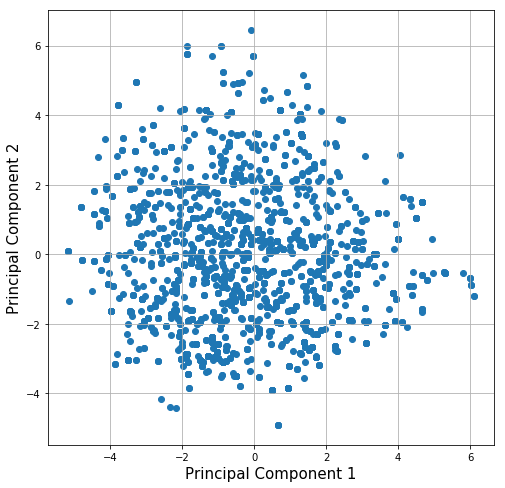

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
    
ax.scatter(principalDf.loc[:, 'principal component 1'], principalDf.loc[:, 'principal component 2'])

ax.grid()